Tipos de tensores

In [ ]:
import torch

lista = [[1,2,3],
         [4,5,6]]

tns = torch.FloatTensor(lista)   #normalmente usado
print(tns.dtype)
print(tns)

tns = torch.DoubleTensor(lista)  #normalmente usado tambem
print(tns.dtype)
print(tns)

tns = torch.LongTensor(lista)    #Usado long quando quer usar inteiro
print(tns.dtype)
print(tns)


torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


instanciar tensores com arrays numpy

In [ ]:
import numpy as np

arr = np.random.rand(3,4)

tns = torch.from_numpy(arr)

print(arr)
print(arr.dtype)

print(tns)
print(tns.dtype)





[[0.20967848 0.36455652 0.50705894 0.10618311]
 [0.65262078 0.15419268 0.24736383 0.35786333]
 [0.78254387 0.98968176 0.09338987 0.36188925]]
float64
tensor([[0.2097, 0.3646, 0.5071, 0.1062],
        [0.6526, 0.1542, 0.2474, 0.3579],
        [0.7825, 0.9897, 0.0934, 0.3619]], dtype=torch.float64)
torch.float64


Tensores inicializados

torch.zeros() -> cria tensor preenchido com zeros

torch.ones() -> cria tensor preenchido com uns

torch.randn() -> cria tensor preenchido com numeros aleatorios

In [ ]:
tns1 = torch.ones(2,3)
tns0 = torch.zeros(4,5)
tnsr = torch.randn(3,3)

print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 0.0338, -0.6854, -0.8814],
        [ 0.3205, -0.7686, -1.1234],
        [ 0.1042,  1.7712,  2.3662]])


operações matematicas com tensores são ponto a ponto



FUNCÇÕES .SIZE() E .VIEW()

In [ ]:
tns = torch.randn(2,2,3)

print(tns1.size())
print('')
print(tns)
print('')
tns = tns.view(-1)   #-1 serve para achatar o tensor
print('')
print(tns)

torch.Size([2, 3])

tensor([[[-1.0070,  1.6311, -1.8183],
         [-0.0460, -0.5188,  1.0359]],

        [[-0.8633, -0.9579,  1.4196],
         [ 0.0123,  0.9550,  0.8664]]])


tensor([-1.0070,  1.6311, -1.8183, -0.0460, -0.5188,  1.0359, -0.8633, -0.9579,
         1.4196,  0.0123,  0.9550,  0.8664])


GPU CAST

In [ ]:
# VERIFICANDO SE TEM GPU DISPONIVEL (BOA PRATICA)

import torch

tns = torch.randn(10)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

tns = tns.to(device)

print(device)
print(tns)

cuda
tensor([ 1.2238, -0.6920, -0.3648, -0.2595,  1.4933,  2.2425, -0.8837,  1.5572,
         0.0211,  0.1055], device='cuda:0')


**PERCEPTRON**

Classificação linear

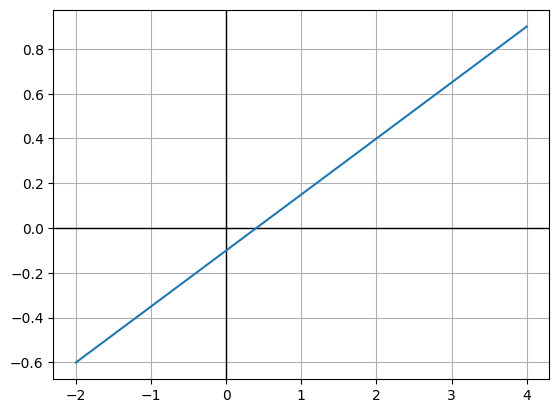

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c = 0 ->  y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2,4,50)
  y = (-a*x -c)/b

  plt.axvline(0,-1,1, color = 'k', linewidth=1)
  plt.axhline(0,-2,4, color = 'k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)


**SOLUCIONANDO A EQUAÇÃO DA RETA PARA DIFERENTES PONTOS**

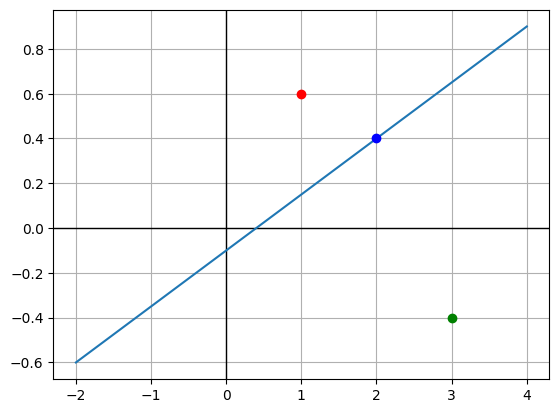

In [ ]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color = 'b', marker = 'o')
plt.plot(p2[0], p2[1], color = 'r', marker = 'o')
plt.plot(p3[0], p3[1], color = 'g', marker = 'o')

In [ ]:
ret1 = a*p1[0] + b*p1[1] + c

print("%.2f" % ret1)

ret1 = a*p2[0] + b*p2[1] + c

print("%.2f" % ret1)

ret1 = a*p3[0] + b*p3[1] + c

print("%.2f" % ret1)

0.00
1.80
-4.20


F(X) = 0 DEFINE PONTOS NA RETA

F(X) > 0 DEFINE PONTOS ACIMA DA RETA

F(X) < 0 DEFINE PONTOS ABAIXO DA RETA

**A RETA SERVE COMO UM CLASSIFICADOR**

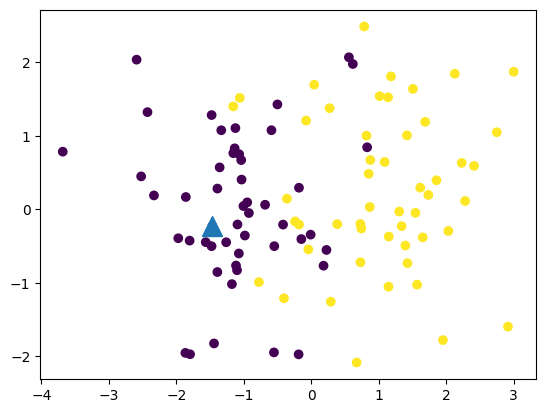

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)
X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

plt.scatter(X[:,0], X[:,1], marker = 'o', c=Y)

p = X[10]

plt.plot(p[0], p[1], marker = '^', markersize = 15)



-2.4


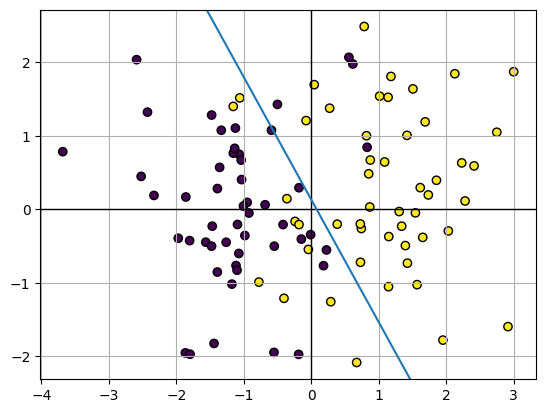

In [4]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:,0], X[:,1], marker = 'o', c=Y, edgecolor = 'k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2,4,50)
  y = (-w1*x -b)/w2

  plt.axvline(0,-1,1, color = 'k', linewidth=1)
  plt.axhline(0,-2,4, color = 'k', linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5  #a
w2 = 3   #b
b = -0.4    #c
plotmodel(w1, w2, b)

p = (-1, 1)

print(w1 * p[0] + w2 * p[1] + b)

1 yellow


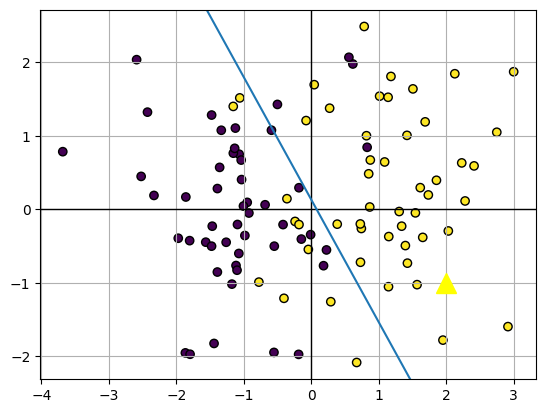

In [8]:
def classify(ponto, w1,w2,b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (2, -1)
classe, cor = classify(p, w1, w2 ,b)
print(classe, cor)
plotmodel(w1,w2,b)
plt.plot(p[0], p[1], marker = '^', color = cor, markersize = 15)

In [6]:
acertos = 0
for K in range(len(X)):
  categ, _ = classify(X[K], w1, w2 ,b)

  if categ == Y[K]:
    acertos += 1

print("ACURÁCIA: {0}".format(100 * acertos/len(X)))

ACURÁCIA: 86.0
